# Data Mining - Computer Assignment #1

## Sina Negarandeh - SID: 810197640

## Prerequisites

Before anything we import libraries needed in this assignment.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# For printing tabular data in nicely formatted tables
from tabulate import tabulate

# For calculating Z-score
from scipy import stats

# For sending HTTP requests
import requests

# For Locating the coordinates
from geopy.geocoders import Nominatim

# For creating interactive geographic visualizations
import folium
from folium.plugins import MarkerCluster

We store the address of each dataset in a variable to maintain a clean code.

In [2]:
houseDatasetPath = 'Datasets/house.csv'
usersDatasetPath = 'Datasets/users.csv'
purchasesDatasetPath = 'Datasets/purchases.csv'

In [3]:
houseDataset = pd.read_csv(houseDatasetPath)
usersDataset = pd.read_csv(usersDatasetPath)
purchasesDataset = pd.read_csv(purchasesDatasetPath)

## Section 1 (House)

### Preprocessing

#### Question 1: Display the first 5 rows of the dataset in Jupyter using the Pandas library.

Here, we use the head(n=5) function, which returns the first n rows. The default value is five, but we also pass the five as an argument.

In [4]:
houseDataset.head(5)
# houseDataset.head() # This line functions similar to the above code and shows that the default value is 5.

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Question 2: Display the number of missing values for each column of this data set.

We change dataframe display through pandas options API to show the dataset more clearly.

In [5]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

It is noteworthy to mention how isna(), notna(), and isnull() work. First, there is no difference between isna() and isnull() methods. isna() returns a boolean same-sized object indicating if the values **are NaN**, and notna() returns a boolean object with the same size of dataframe, indicating if the values **are not NaN**.

To find the number of missing values for each column of this dataset, we use the sum() over the isna() function.

In [6]:
houseDataset.isna().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

If we use another sum() function over the previous result, we can find the total number of missing values in the dataset. 

In [7]:
houseDataset.isna().sum().sum()

13965

#### Question 3: What approach is suitable for each of the columns, mention the reason. (Solutions can include deleting rows containing missing data or inserting data in that place)

The info() function can print a concise summary of our dataframe. It describes the non-null count number and the data type for each column. This provides us with meaningful insight from the dataset, which can be used for finding suitable methods for handling missing values.

In [8]:
houseDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

NaN values can mean different things depending on the data's type and context. Another factor can be the **proportion of missing values in one column**. If the ratio is less than 5%, we can drop those rows without losing a lot of information. We can fill the missing values with the proper methods if the proportion is between 5% and 30%. It is essential to consider the type of data when analyzing it. Here NaN represents a valid category for some columns, and then we should not replace it with another value. However, we need to rename it into something else which is more descriptive of that valid value. Here, we rename it to NX (short for nix.) This helps in avoiding confusion when counting the number of missing data.

Here, we have listed the name, description, type, and whether NaN represents a valued category to find proper methods for handling missing values. (• means NaN represents a valued category)

MSZoning: Identifies the general zoning classification of the sale. - Categorical

LotFrontage: Linear feet of street connected to property - Numerical

• Alley: Type of alley access to property - Categorical

Utilities: Type of utilities available - Categorical

Exterior1st: Exterior covering on house - Categorical

Exterior2nd: Exterior covering on house (if more than one material) - Categorical

MasVnrType: Masonry veneer type - Categorical

MasVnrArea: Masonry veneer area in square feet - Numerical

• BsmtQual: Evaluates the height of the basement - Categorical

• BsmtCond: Evaluates the general condition of the basement - Categorical

• BsmtExposure: Refers to walkout or garden level walls - Categorical

• BsmtFinType1: Rating of basement finished area - Categorical

BsmtFinSF1: Type 1 finished square feet - Numerical

• BsmtFinType2: Rating of basement finished area (if multiple types) - Categorical

BsmtFinSF2: Type 2 finished square feet - Numerical

BsmtUnfSF: Unfinished square feet of basement area - Numerical

TotalBsmtSF: Total square feet of basement area - Numerical

Electrical: Electrical system - Categorical

BsmtFullBath: Basement full bathrooms - Numerical

BsmtHalfBath: Basement half bathrooms - Numerical

KitchenQual: Kitchen quality - Categorical

Functional: Home functionality (Assume typical unless deductions are warranted) - Categorical

• FireplaceQu: Fireplace quality - Categorical

• GarageType: Garage location - Categorical

GarageYrBlt: Year garage was built - Numerical

• GarageFinish: Interior finish of the garage - Categorical

GarageCars: Size of garage in car capacity - Numerical

GarageArea: Size of garage in square feet - Numerical

• GarageQual: Garage quality - Categorical

• GarageCond: Garage condition - Categorical

• PoolQC: Pool quality - Categorical

• Fence: Fence quality - Categorical

• MiscFeature: Miscellaneous feature not covered in other categories - Categorical

SaleType: Type of sale - Categorical

We write a function to find the proportion of missing values in each column.

In [9]:
def printPercentageOfMissingData(dataframe):
    data = []
    for column in dataframe:
        numMissingData = dataframe[column].isnull().sum()

        if numMissingData > 0:
            data.append([column, numMissingData, "{:.2f}".format((numMissingData / len(dataframe[column]) * 100))])

    print(tabulate(data, headers=['Column', 'Number of missing data', 'Percentage of missing data']))

In [10]:
printPercentageOfMissingData(houseDataset)

Column          Number of missing data    Percentage of missing data
------------  ------------------------  ----------------------------
MSZoning                             4                          0.14
LotFrontage                        486                         16.65
Alley                             2721                         93.22
Utilities                            2                          0.07
Exterior1st                          1                          0.03
Exterior2nd                          1                          0.03
MasVnrType                          24                          0.82
MasVnrArea                          23                          0.79
BsmtQual                            81                          2.77
BsmtCond                            82                          2.81
BsmtExposure                        82                          2.81
BsmtFinType1                        79                          2.71
BsmtFinSF1                        

#### Question 4: Solve the missing data problem using the methods selected in question 3.

As mentioned in some columns, NaN represents a valid category. As a result, we should not replace it with another value. However, we need to rename it into something else which is more descriptive of that valid value. Here, we rename it to NX (short for nix.) This helps in avoiding confusion when counting the number of missing data.

In [11]:
categories = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu',
          'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']

for category in categories:
    houseDataset[category].fillna('NX', inplace=True)

In [12]:
printPercentageOfMissingData(houseDataset)

Column          Number of missing data    Percentage of missing data
------------  ------------------------  ----------------------------
MSZoning                             4                          0.14
LotFrontage                        486                         16.65
Utilities                            2                          0.07
Exterior1st                          1                          0.03
Exterior2nd                          1                          0.03
MasVnrType                          24                          0.82
MasVnrArea                          23                          0.79
BsmtFinSF1                           1                          0.03
BsmtFinSF2                           1                          0.03
BsmtUnfSF                            1                          0.03
TotalBsmtSF                          1                          0.03
Electrical                           1                          0.03
BsmtFullBath                      

As we mentioned, if the proportion is less than 5%, we can drop those rows without losing a lot of information. Here, only LotFrontage and GarageYrBlt have missing values, which is more than 5% of the proportion of the column. Therefore, except for these two columns, we drop rows that include missing values.

In [13]:
houseDataset.dropna(subset=['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
                           'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath',
                            'BsmtHalfBath', 'KitchenQual', 'Functional', 'GarageCars', 'GarageArea', 'SaleType'], inplace=True)

In [14]:
houseDataset.count()

Id               2882
MSSubClass       2882
MSZoning         2882
LotFrontage      2404
LotArea          2882
Street           2882
Alley            2882
LotShape         2882
LandContour      2882
Utilities        2882
LotConfig        2882
LandSlope        2882
Neighborhood     2882
Condition1       2882
Condition2       2882
BldgType         2882
HouseStyle       2882
OverallQual      2882
OverallCond      2882
YearBuilt        2882
YearRemodAdd     2882
RoofStyle        2882
RoofMatl         2882
Exterior1st      2882
Exterior2nd      2882
MasVnrType       2882
MasVnrArea       2882
ExterQual        2882
ExterCond        2882
Foundation       2882
BsmtQual         2882
BsmtCond         2882
BsmtExposure     2882
BsmtFinType1     2882
BsmtFinSF1       2882
BsmtFinType2     2882
BsmtFinSF2       2882
BsmtUnfSF        2882
TotalBsmtSF      2882
Heating          2882
HeatingQC        2882
CentralAir       2882
Electrical       2882
1stFlrSF         2882
2ndFlrSF         2882
LowQualFin

In [15]:
printPercentageOfMissingData(houseDataset)

Column         Number of missing data    Percentage of missing data
-----------  ------------------------  ----------------------------
LotFrontage                       478                         16.59
GarageYrBlt                       156                          5.41


Source: https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html

After studying and analyzing the dataset, we concluded that the year that garage was built is almost always similar to the year the house was built; therefore, we replaced missing values in GarageYr. And when the house does not have a garage, we replace it with zero.

In [16]:
houseDataset[houseDataset['GarageYrBlt'].isna()][['GarageType', 'GarageYrBlt']].count()

GarageType     156
GarageYrBlt      0
dtype: int64

In [17]:
houseDataset[(houseDataset['GarageType'] == 'NX')][['GarageType', 'GarageYrBlt']].count()

GarageType     155
GarageYrBlt      0
dtype: int64

In [18]:
houseDataset[(houseDataset['GarageType'] != 'NX') & (houseDataset['GarageYrBlt'].isna())][['GarageType', 'GarageYrBlt']]

,GarageType,GarageYrBlt
2126,Detchd,NaN


In [19]:
houseDataset.loc[(houseDataset['Id'] == 2127), 'GarageYrBlt'] = houseDataset[houseDataset['Id'] == 2127]['YearBuilt']

In [20]:
houseDataset['GarageYrBlt'].fillna(0, inplace=True)

In [21]:
houseDataset.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      478
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         0
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

In [22]:
houseDataset['GarageYrBlt']

0       2003.0
1       1976.0
2       2001.0
3       1998.0
4       2000.0
         ...  
2914       0.0
2915    1970.0
2916    1960.0
2917       0.0
2918    1993.0
Name: GarageYrBlt, Length: 2882, dtype: float64

In [23]:
printPercentageOfMissingData(houseDataset)

Column         Number of missing data    Percentage of missing data
-----------  ------------------------  ----------------------------
LotFrontage                       478                         16.59


If LotFrontage does not have any value we consider it zero.

In [24]:
houseDataset['LotFrontage'].fillna(0, inplace=True)

In [25]:
houseDataset.isna().sum().sum()

0

As displayed above we handled all of the missing values.

#### Question 5: Identify the outlier data and explain how to deal with them. (Removing rows or normalizing data is part of the methods that you can use)

First, we need to define what are outlier data. In statistics, an outlier is a data point that differs significantly from other observations. But why are they important? The reason is that outliers can cause problems in our analysis by distorting or altering our results or even hiding some critical findings. Now that we know what outliers are and why they are essential, we should identify them. There are several methods for identifying outliers. We can use scatter or box plots, calculate Z-score, or other methods. Here, we use both graphical and numerical methods.

Text(0.5, 1.0, 'YearRemodAdd Histogram')

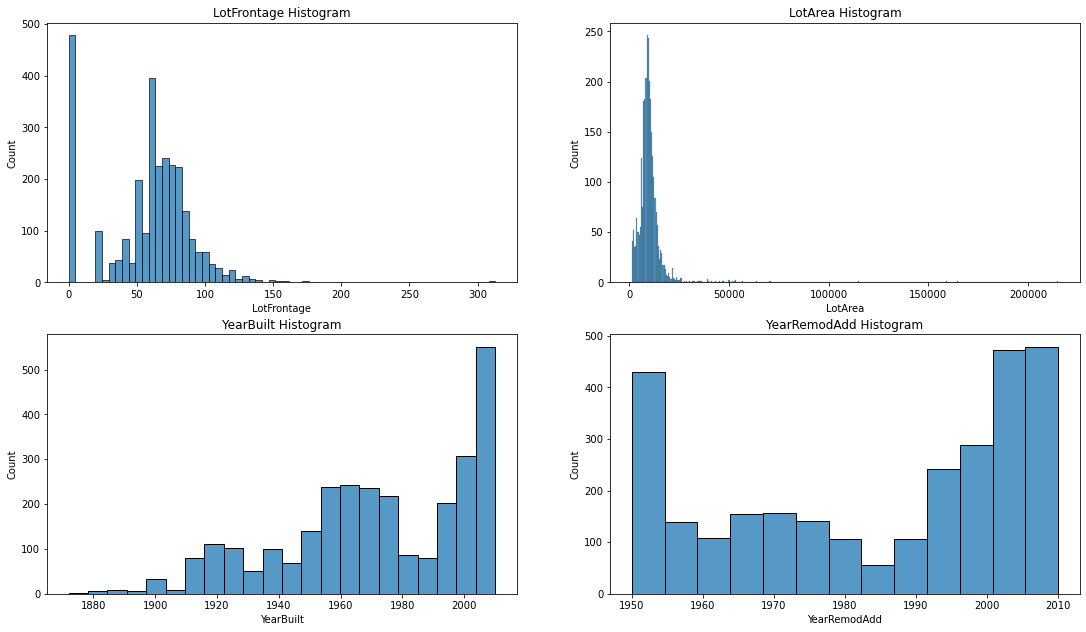

In [26]:
fig, axes = plt.subplots(2, 2)
fig.set_size_inches(18.5, 10.5)
mpl.rcParams['text.color'] = '#3478F5'

sns.histplot(houseDataset['LotFrontage'], ax=axes[0,0])
axes[0, 0].set_title('LotFrontage Histogram')
sns.histplot(houseDataset['LotArea'], ax=axes[0,1])
axes[0, 1].set_title('LotArea Histogram')
sns.histplot(houseDataset['YearBuilt'], ax=axes[1,0])
axes[1, 0].set_title('YearBuilt Histogram')
sns.histplot(houseDataset['YearRemodAdd'], ax=axes[1,1])
axes[1, 1].set_title('YearRemodAdd Histogram')

We can visually guess and identify outliers by looking at the distribution and bins with very low frequency. However, we need a better method for identifying outliers. Boxplots can help us with that.

Text(0.5, 1.0, 'YearBuilt & YearRemodAdd Boxplot')

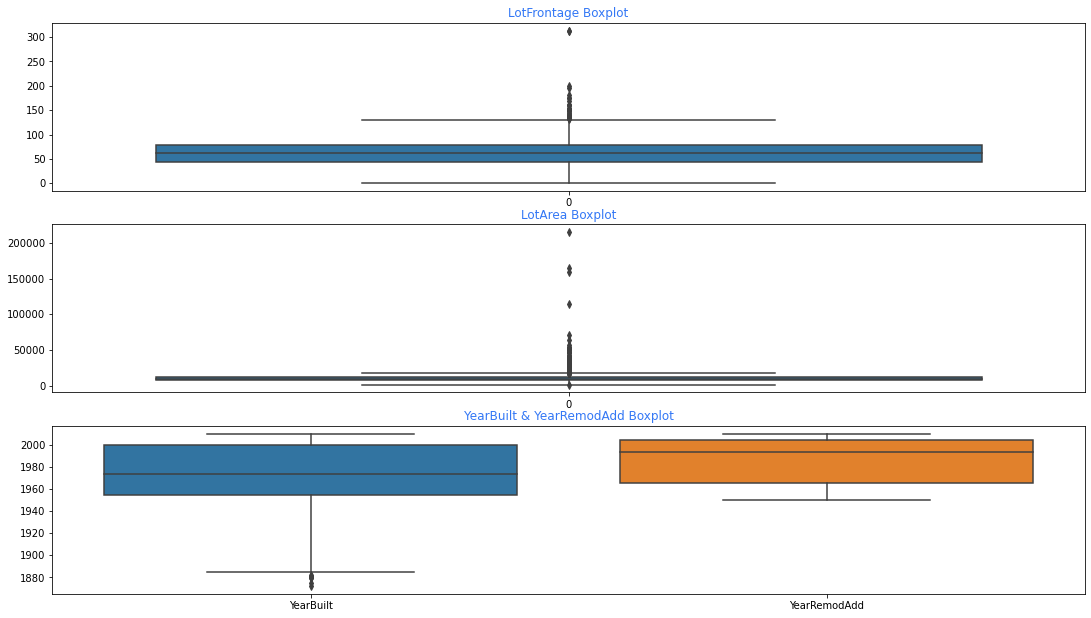

In [27]:
fig, axes = plt.subplots(3, 1)
fig.set_size_inches(18.5, 10.5)

sns.boxplot(data=houseDataset['LotFrontage'], ax=axes[0])
axes[0].set_title('LotFrontage Boxplot')
sns.boxplot(data=houseDataset['LotArea'], ax=axes[1])
axes[1].set_title('LotArea Boxplot')
sns.boxplot(data=houseDataset[['YearBuilt', 'YearRemodAdd']], ax=axes[2])
axes[2].set_title('YearBuilt & YearRemodAdd Boxplot')

A boxplot defines a range by defining an upper and lower boundary, and any value outside this range is considered an outlier.

After our graphical analysis, we move on to our numerical analysis. First, we can use describe method to generate descriptive statistics of our dataset.

In [28]:
houseDataset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2882.000000,2882.000000,2882.000000,2882.000000,2882.000000,2882.000000,2882.000000,2882.000000,2882.000000,2882.000000,2882.000000,2882.000000,2882.000000,2882.000000,2882.000000,2882.000000,2882.000000,2882.000000,2882.000000,2882.000000,2882.000000,2882.000000,2882.000000,2882.000000,2882.000000,2882.000000,2882.000000,2882.000000,2882.000000,2882.000000,2882.000000,2882.000000,2882.000000,2882.000000,2882.000000,2882.000000,2882.000000,2882.000000
mean,1453.957668,57.302221,57.690493,10103.730396,6.089174,5.575642,1971.206107,1984.180777,102.511103,442.343511,49.795628,560.041985,1052.181124,1158.324774,336.301180,4.715128,1499.341083,0.430951,0.062110,1.564885,0.378210,2.860861,1.044761,6.453158,0.596461,1871.559681,1.766482,472.961832,94.190493,47.169327,22.999653,2.635670,16.239417,2.280708,51.218251,6.209924,2007.794587,180772.665510
std,843.034506,42.649780,33.383075,7812.027633,1.401403,1.105037,30.215365,20.854755,179.584636,455.340108,169.418562,438.993978,439.380283,389.002736,428.808002,46.646421,505.593279,0.525226,0.247081,0.551533,0.501906,0.822962,0.215042,1.570751,0.644762,446.944189,0.762229,215.605274,126.928071,67.147952,64.136507,25.347659,56.501028,35.891308,570.857095,2.706901,1.317966,77453.393853
min,1.000000,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,724.250000,20.000000,43.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,0.000000,220.250000,793.000000,877.250000,0.000000,0.000000,1123.250000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1957.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,130000.000000
50%,1450.500000,50.000000,63.000000,9429.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,370.000000,0.000000,466.500000,990.000000,1082.000000,0.000000,0.000000,1442.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1977.000000,2.000000,479.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2181.750000,70.000000,78.000000,11500.000000,7.000000,6.000000,2000.000000,2004.000000,164.750000,733.000000,0.000000,802.750000,1300.000000,1383.000000,704.000000,0.000000,1743.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2010.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


As mentioned above, we can calculate the z-score and find outliers numerically. But after calculating the z-score, how can we decide whether a value is an outlier? After exploring source materials, we concluded that a z-score of 3 is usually considered a cut-off value to set the limit. Hence, here we use three as our boundary value. 

In [29]:
np.abs(stats.zscore(houseDataset['LotFrontage']))

0       0.218996
1       0.668404
2       0.308878
3       0.069194
4       0.788246
          ...   
2914    1.099265
2915    1.099265
2916    3.065244
2917    0.129115
2918    0.488641
Name: LotFrontage, Length: 2882, dtype: float64

We find numerical values in order to calculate their z-score; however, not all of these columns need to be processed the same way. For instance, MSSubClass only takes specific limited values, so there is no need for the z-score calculation.

In [30]:
houseDataset.select_dtypes(include= np.number).columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

We separate columns for the z-score calculation.

In [31]:
numerical_data = ['LotFrontage',
'LotArea',
'YearBuilt',
'YearRemodAdd',
'MasVnrArea',
'BsmtFinSF1',
'BsmtFinSF2',
'BsmtUnfSF',
'TotalBsmtSF',
'1stFlrSF',
'2ndFlrSF',
'LowQualFinSF',
'GrLivArea',
'Fireplaces',
'GarageYrBlt',
'GarageCars',
'GarageArea',
'WoodDeckSF',
'OpenPorchSF',
'EnclosedPorch',
'3SsnPorch',
'ScreenPorch',
'PoolArea',
'MiscVal',
'MoSold',
'YrSold']

There are multiple ways to handle outliers, such as removing them, imputing them (mean, median, mode imputation methods), and capping them. Here, we use capping option in order to maintain our data (since the number of outliers is huge) and to keep the process simple.

In [32]:
def capOutliers(dataframe, columns):
    for col in columns:
        mean = dataframe[col].mean()
        std = dataframe[col].std()

        dataframe[col] = np.clip(dataframe[col], mean - 3 * std, mean + 3 * std)

In [33]:
capOutliers(houseDataset, numerical_data)

In [34]:
# We can drop outliers by using the code below
# houseDataset.drop(houseDataset[(np.abs(stats.zscore(houseDataset[numerical_data])) > 3).any(axis=1)].index, inplace=True)

We plot the data again for the sake of comparison.

Text(0.5, 1.0, 'YearRemodAdd Histogram')

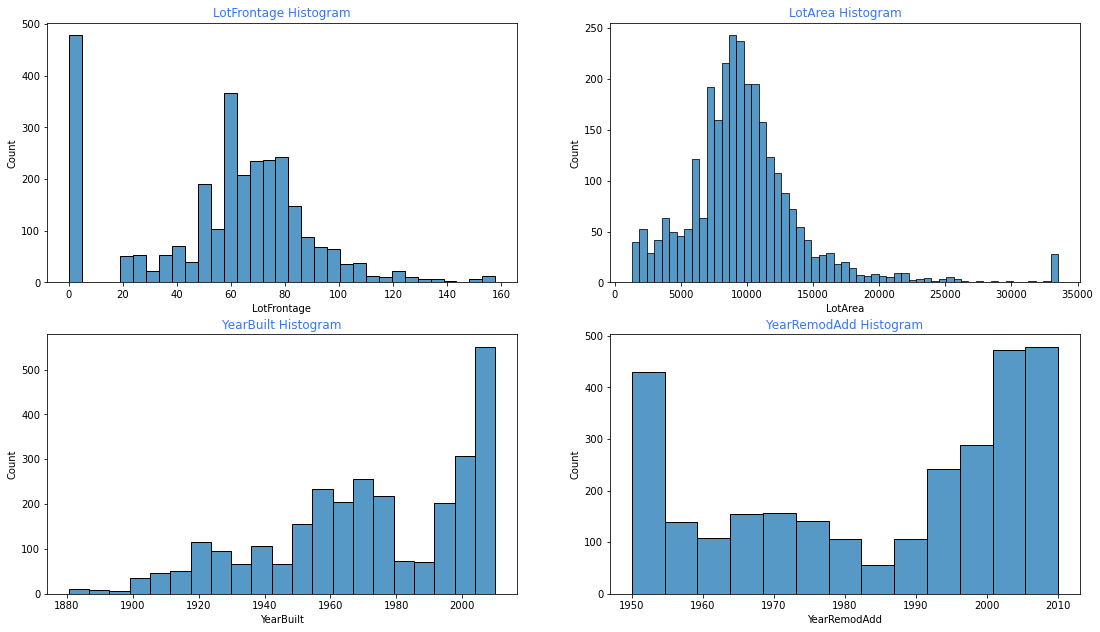

In [35]:
fig, axes = plt.subplots(2, 2)
fig.set_size_inches(18.5, 10.5)

sns.histplot(houseDataset['LotFrontage'], ax=axes[0,0])
axes[0, 0].set_title('LotFrontage Histogram')
sns.histplot(houseDataset['LotArea'], ax=axes[0,1])
axes[0, 1].set_title('LotArea Histogram')
sns.histplot(houseDataset['YearBuilt'], ax=axes[1,0])
axes[1, 0].set_title('YearBuilt Histogram')
sns.histplot(houseDataset['YearRemodAdd'], ax=axes[1,1])
axes[1, 1].set_title('YearRemodAdd Histogram')

Text(0.5, 1.0, 'YearBuilt & YearRemodAdd Boxplot')

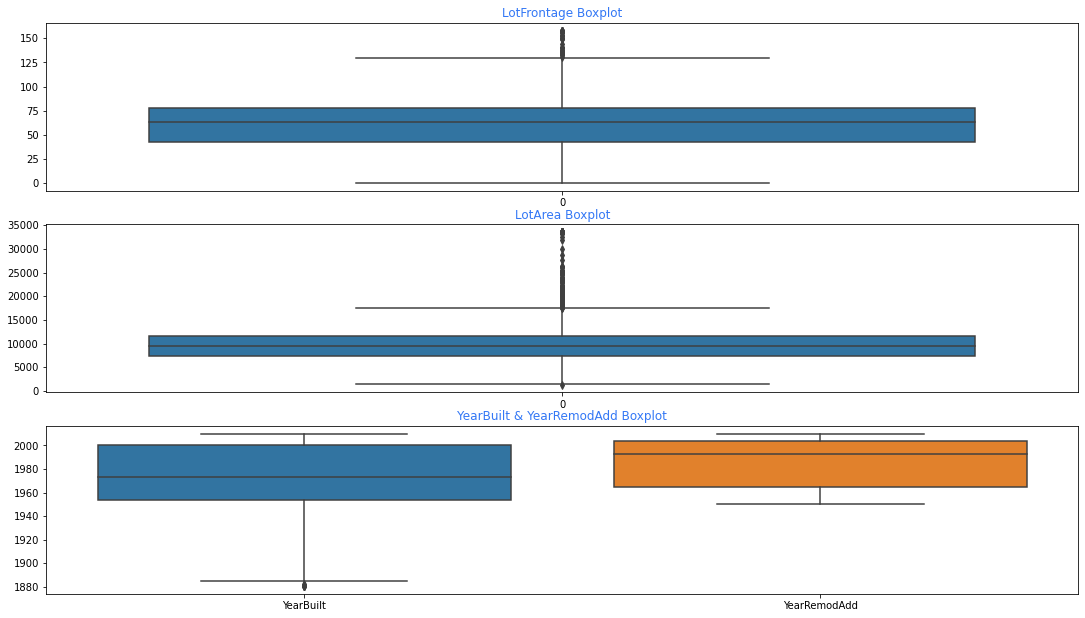

In [36]:
fig, axes = plt.subplots(3, 1)
fig.set_size_inches(18.5, 10.5)

sns.boxplot(data=houseDataset['LotFrontage'], ax=axes[0])
axes[0].set_title('LotFrontage Boxplot')
sns.boxplot(data=houseDataset['LotArea'], ax=axes[1])
axes[1].set_title('LotArea Boxplot')
sns.boxplot(data=houseDataset[['YearBuilt', 'YearRemodAdd']], ax=axes[2])
axes[2].set_title('YearBuilt & YearRemodAdd Boxplot')

In [37]:
houseDataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000000,8450.0,Pave,NX,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003.0,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856.0,854.0,0.0,1710.0,1.0,0.0,2,1,3,1,Gd,8,Typ,0.0,NX,Attchd,2003.000000,RFn,2.0,548.0,TA,TA,Y,0.0,61.0,0.000000,0.0,0.0,0.0,NX,NX,NX,0.0,2,2008,WD,Normal,208500
1,2,20,RL,80.000000,9600.0,Pave,NX,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976.0,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262.0,0.0,0.0,1262.0,0.0,1.0,2,0,3,1,TA,6,Typ,1.0,TA,Attchd,1976.000000,RFn,2.0,460.0,TA,TA,Y,298.0,0.0,0.000000,0.0,0.0,0.0,NX,NX,NX,0.0,5,2007,WD,Normal,181500
2,3,60,RL,68.000000,11250.0,Pave,NX,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001.0,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920.0,866.0,0.0,1786.0,1.0,0.0,2,1,3,1,Gd,6,Typ,1.0,TA,Attchd,2001.000000,RFn,2.0,608.0,TA,TA,Y,0.0,42.0,0.000000,0.0,0.0,0.0,NX,NX,NX,0.0,9,2008,WD,Normal,223500
3,4,70,RL,60.000000,9550.0,Pave,NX,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915.0,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961.0,756.0,0.0,1717.0,1.0,0.0,1,0,3,1,Gd,7,Typ,1.0,Gd,Detchd,1998.000000,Unf,3.0,642.0,TA,TA,Y,0.0,35.0,215.409173,0.0,0.0,0.0,NX,NX,NX,0.0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000000,14260.0,Pave,NX,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000.0,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145.0,1053.0,0.0,2198.0,1.0,0.0,2,1,4,1,Gd,9,Typ,1.0,TA,Attchd,2000.000000,RFn,3.0,836.0,TA,TA,Y,192.0,84.0,0.000000,0.0,0.0,0.0,NX,NX,NX,0.0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.000000,1936.0,Pave,NX,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970.0,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546.0,546.0,0.0,1092.0,0.0,0.0,1,1,3,1,TA,5,Typ,0.0,NX,NX,530.727114,NX,0.0,0.0,NX,NX,Y,0.0,0.0,0.000000,0.0,0.0,0.0,NX,NX,NX,0.0,6,2006,WD,Normal,177000
2915,2916,160,RM,21.000000,1894.0,Pave,NX,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970.0,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546.0,546.0,0.0,1092.0,0.0,0.0,1,1,3,1,TA,6,Typ,0.0,NX,CarPort,1970.000000,Unf,1.0,286.0,TA,TA,Y,0.0,24.0,0.000000,0.0,0.0,0.0,NX,NX,NX,0.0,4,2006,WD,Abnorml,181000
2916,2917,20,RL,157.839717,20000.0,Pave,NX,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960.0,1996,Gable,CompShg,VinylSd,VinylSd,None,

#### Question 6: Check if there are any conflicting values, mention two. (For an example of a contradiction, you can refer to a house with a low area that is more expensive than a house with a high area, for this specific example, mention a few houses with this condition and also hypothesize the reason for this contradiction.)

Here, we take the first row as as axample and find LotArea and SalePrice of it. Then we find all of the items that have lower area but are more expensive.

In [38]:
houseDataset[['LotArea', 'SalePrice']].iloc[0]

LotArea        8450.0
SalePrice    208500.0
Name: 0, dtype: float64

In [39]:
houseDataset[(houseDataset['LotArea'] < 8450.0) & (houseDataset['SalePrice'] > 208500.0)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
34,35,120,RL,60.0,7313.0,Pave,NX,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,TwnhsE,1Story,9,5,2005.0,2005,Hip,CompShg,MetalSd,MetalSd,BrkFace,246.0,Ex,TA,PConc,Ex,TA,No,GLQ,1153.0,Unf,0.0,408.0,1561.0,GasA,Ex,Y,SBrkr,1561.0,0.0,0.0,1561.0,1.0,0.0,2,0,2,1,Ex,6,Typ,1.0,Gd,Attchd,2005.000000,Fin,2.0,556.0,TA,TA,Y,203.0,47.0,0.0,0.0,0.0,0.0,NX,NX,NX,0.0,8,2007,WD,Normal,277500
45,46,120,RL,61.0,7658.0,Pave,NX,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,TwnhsE,1Story,9,5,2005.0,2005,Hip,CompShg,MetalSd,MetalSd,BrkFace,412.0,Ex,TA,PConc,Ex,TA,No,GLQ,456.0,Unf,0.0,1296.0,1752.0,GasA,Ex,Y,SBrkr,1752.0,0.0,0.0,1752.0,1.0,0.0,2,0,2,1,Ex,6,Typ,1.0,Gd,Attchd,2005.000000,RFn,2.0,576.0,TA,TA,Y,196.0,82.0,0.0,0.0,0.0,0.0,NX,NX,NX,0.0,2,2010,WD,Normal,319900
114,115,70,RL,61.0,7259.0,Pave,NX,IR1,Lvl,AllPub,Inside,Mod,Crawfor,Norm,Norm,1Fam,2Story,6,8,1945.0,2002,Gambrel,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,774.0,LwQ,150.0,104.0,1028.0,GasA,Ex,Y,SBrkr,1436.0,884.0,0.0,2320.0,1.0,0.0,2,1,3,1,Gd,9,Typ,1.0,TA,Detchd,1945.000000,Unf,1.0,180.0,TA,TA,Y,224.0,0.0,0.0,0.0,0.0,0.0,NX,MnPrv,NX,0.0,7,2007,WD,Normal,259500
133,134,20,RL,0.0,6853.0,Pave,NX,IR1,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2001.0,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,136.0,Gd,TA,PConc,Ex,TA,No,GLQ,1005.0,Unf,0.0,262.0,1267.0,GasA,Ex,Y,SBrkr,1296.0,0.0,0.0,1296.0,1.0,0.0,2,0,2,1,Gd,6,Typ,0.0,NX,Attchd,2001.000000,Fin,2.0,471.0,TA,TA,Y,192.0,25.0,0.0,0.0,0.0,0.0,NX,NX,NX,0.0,6,2009,WD,Normal,220000
172,173,160,RL,44.0,5306.0,Pave,NX,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,2Story,7,7,1987.0,1987,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,Gd,PConc,Gd,Gd,No,GLQ,495.0,Rec,215.0,354.0,1064.0,GasA,Gd,Y,SBrkr,1064.0,703.0,0.0,1767.0,1.0,0.0,2,0,2,1,Gd,5,Typ,1.0,TA,Attchd,1987.000000,RFn,2.0,504.0,Gd,TA,Y,441.0,35.0,0.0,0.0,0.0,0.0,NX,NX,NX,0.0,6,2006,WD,Normal,239000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2887,2888,50,RM,50.0,7000.0,Pave,NX,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1.5Fin,6,7,1926.0,1950,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,PConc,TA,TA,No,ALQ,374.0,Unf,0.0,487.0,861.0,GasA,Ex,Y,SBrkr,861.0,424.0,0.0,1285.0,0.0,1.0,1,0,3,1,TA,6,Typ,0.0,NX,Detchd,1950.000000,Fin,2.0,506.0,TA,TA,Y,96.0,0.0,132.0,0.0,0.0,0.0,NX,MnPrv,NX,0.0,5,2006,WD,Normal,250000
2889,2890,30,RM,50.0,7030.0,Pave,NX,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,4,6,1925.0,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,641.0,641.0,GasA,Gd,Y,SBrkr,641.0,0.0,0.0,641.0,0.0,0.0,1,0,2,1,Fa,4,Typ,0.0,NX,Detchd,1925.000000,Unf,1.0,272.0,TA,TA,N,184.0,0.0,70.0,0.0,0.0,0.0,NX,MnPrv,NX,0.0,3,2006,WD,Normal,225000
2894,2895,120,RM,41.0,5748.0,Pave,NX,IR1,HLS,AllPub,Inside,Mod,Crawfor,Norm,Norm,TwnhsE,1Story,8,5,2005.0,2006,Hip,CompShg,CemntBd,CmentBd,Stone,473.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1573

In [40]:
houseDataset.iloc[0]

Id                     1
MSSubClass            60
MSZoning              RL
LotFrontage         65.0
LotArea           8450.0
Street              Pave
Alley                 NX
LotShape             Reg
LandContour          Lvl
Utilities         AllPub
LotConfig         Inside
LandSlope            Gtl
Neighborhood     CollgCr
Condition1          Norm
Condition2          Norm
BldgType            1Fam
HouseStyle        2Story
OverallQual            7
OverallCond            5
YearBuilt         2003.0
YearRemodAdd        2003
RoofStyle          Gable
RoofMatl         CompShg
Exterior1st      VinylSd
Exterior2nd      VinylSd
MasVnrType       BrkFace
MasVnrArea         196.0
ExterQual             Gd
ExterCond             TA
Foundation         PConc
BsmtQual              Gd
BsmtCond              TA
BsmtExposure          No
BsmtFinType1         GLQ
BsmtFinSF1         706.0
BsmtFinType2         Unf
BsmtFinSF2           0.0
BsmtUnfSF          150.0
TotalBsmtSF        856.0
Heating             GasA


We plot the data again for the sake of comparison. So above, we found a few examples of the mentioned contradiction (a house with a low area is more expensive than a house with a high area). Next, we want to hypothesize the reason for this contradiction. After studying the results carefully, we can find that although the house is smaller in other categories offer something better than this house. For instance, some houses have better OverallQual and OverallCond. In other cases, they have larger WoodDeckSF, 1stFlrSF, TotalBsmtSF, or MasVnrArea, better FireplaceQu, BsmtQual, ExterQual, or KitchenQual.

Here we check for any other conflicting values. We find some houses have been remodeled sooner than they have been built, or some houses have been sold sooner than they have been made. We also found some cases where something was unavailable but had an area.

In [41]:
houseDataset[(houseDataset['YearBuilt'] > houseDataset['YearRemodAdd'])]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1876,1877,20,RL,65.0,10739.0,Pave,NX,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2002.0,2001,Gable,CompShg,VinylSd,VinylSd,BrkFace,68.0,Gd,TA,PConc,Gd,TA,No,GLQ,1259.0,Unf,0.0,172.0,1431.0,GasA,Ex,Y,SBrkr,1444.0,0.0,0.0,1444.0,1.0,0.0,2,0,3,1,Gd,6,Typ,0.0,NX,Attchd,2002.0,RFn,2.0,577.0,TA,TA,Y,144.0,40.0,0.0,0.0,0.0,0.0,NX,NX,NX,0.0,4,2009,WD,Normal,283463


In [42]:
houseDataset[(houseDataset['YearBuilt'] > houseDataset['YrSold'])]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2549,2550,20,RL,128.0,33539.813294,Pave,NX,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008.0,2009,Hip,CompShg,CemntBd,CmentBd,Stone,641.265011,Ex,TA,PConc,Ex,TA,Gd,GLQ,1808.363834,Unf,0.0,1085.0,2370.321975,GasA,Ex,Y,SBrkr,2325.332983,0.0,0.0,3016.120919,1.0,1.0,2,1,2,1,Ex,15,Typ,2.0,Gd,Attchd,2008.0,Fin,3.0,1119.777653,TA,TA,Y,474.974707,248.613182,0.0,0.0,0.0,0.0,NX,NX,NX,1763.789536,10,2007,New,Partial,107000


In [43]:
houseDataset[(houseDataset['MasVnrArea'] > 0) & (houseDataset['MasVnrType'] == 'None')][['MasVnrArea', 'MasVnrType']]

,MasVnrArea,MasVnrType
624,288.0,None
773,1.0,None
1230,1.0,None
1300,344.0,None
1334,312.0,None
1669,285.0,None
2452,1.0,None


In [44]:
houseDataset[(houseDataset['GarageArea'] > 0) & (houseDataset['GarageQual'] == 'NX')][['GarageArea', 'GarageQual']]

,GarageArea,GarageQual
2126,360.0,NX


In [45]:
houseDataset[(houseDataset['PoolArea'] > 0) & (houseDataset['PoolQC'] == 'NX')][['PoolArea', 'PoolQC']]

,PoolArea,PoolQC
2420,109.954633,NX
2503,109.954633,NX
2599,109.954633,NX


More

### Data Visualization

#### Question 1: Display the average house price in each neighborhood with a bar chart, and the average value should be written on each bar with the appropriate font and color. (When displaying data using a bar graph and when the number of bars is high, it is better that the bars are displayed horizontally, also, sorting the values in descending order gives a clear view to the spectators)

Here, we show unique values in our dataset. As displayed there are 25 unique neighborhood values.

In [46]:
houseDataset.nunique()

Id               2882
MSSubClass         16
MSZoning            5
LotFrontage       122
LotArea          1899
Street              2
Alley               3
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         115
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        387
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            5
BsmtCond            5
BsmtExposure        5
BsmtFinType1        7
BsmtFinSF1        970
BsmtFinType2        7
BsmtFinSF2        187
BsmtUnfSF        1115
TotalBsmtSF      1032
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF         1048
2ndFlrSF          621
LowQualFin

Here, we display the average house price in each neighborhood.

In [47]:
houseDataset.groupby('Neighborhood')['SalePrice'].mean()

Neighborhood
Blmngtn    184062.142857
Blueste    192496.400000
BrDale     136330.000000
BrkSide    152557.140187
ClearCr    198171.930233
CollgCr    190450.271698
Crawfor    186762.401961
Edwards    153056.513089
Gilbert    180082.018868
IDOTRR     149238.795455
MeadowV    144463.594595
Mitchel    176514.553571
NAmes      163959.690745
NPkVill    150850.000000
NWAmes     187598.679389
NoRidge    282119.957746
NridgHt    242404.152439
OldTown    155431.092050
SWISU      152469.979167
Sawyer     158200.640000
SawyerW    188914.411290
Somerst    200861.186047
StoneBr    239900.333333
Timber     220614.042857
Veenker    209478.208333
Name: SalePrice, dtype: float64

We sort them in an ascending order.

In [48]:
houseZoneDataset = houseDataset.groupby('Neighborhood')['SalePrice'].mean().reset_index()
houseZoneDataset.sort_values(by=['SalePrice'], inplace=True)
houseZoneDataset

,Neighborhood,SalePrice
2,BrDale,136330.000000
10,MeadowV,144463.594595
9,IDOTRR,149238.795455
13,NPkVill,150850.000000
18,SWISU,152469.979167
3,BrkSide,152557.140187
7,Edwards,153056.513089
17,OldTown,155431.092050
19,Sawyer,158200.640000
12,NAmes,163959.690745


We plot the average house price in each neighborhood with a bar chart. As requested, the average value is  written on each bar with the appropriate font and color.

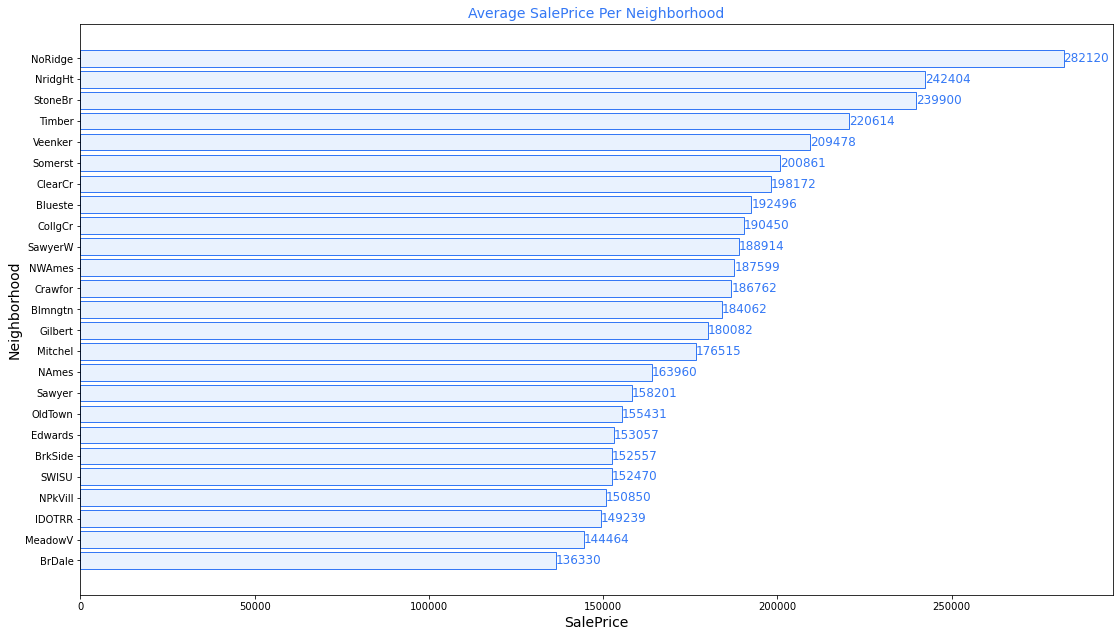

In [49]:
fig, ax = plt.subplots()

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

bars = ax.barh(houseZoneDataset['Neighborhood'], houseZoneDataset['SalePrice'], facecolor='#E9F2FE', edgecolor='#3478F5')

ax.bar_label(bars, fontsize=12)

plt.title('Average SalePrice Per Neighborhood', fontsize=14)
plt.xlabel('SalePrice', fontsize=14)
plt.ylabel('Neighborhood', fontsize=14)

plt.show()

#### Question 2: Identify the five neighborhoods with the largest number of houses and the five neighborhoods with the most expensive houses.

Here, we find the five neighborhoods with the largest number of houses.

In [50]:
houseDataset.groupby('Neighborhood')['SalePrice'].count().sort_values(ascending=False)

Neighborhood
NAmes      443
CollgCr    265
OldTown    239
Edwards    191
Somerst    172
NridgHt    164
Gilbert    159
Sawyer     150
NWAmes     131
SawyerW    124
Mitchel    112
BrkSide    107
Crawfor    102
IDOTRR      88
NoRidge     71
Timber      70
StoneBr     51
SWISU       48
ClearCr     43
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Name: SalePrice, dtype: int64

Here, we find the five neighborhoods with the most expensive houses.

In [51]:
houseDataset[['Neighborhood', 'SalePrice']].sort_values(by='SalePrice', ascending=False)

,Neighborhood,SalePrice
691,NoRidge,755000
1182,NoRidge,745000
2851,CollgCr,745000
1169,NoRidge,625000
1827,BrkSide,611657
...,...,...
916,IDOTRR,35311
2313,Gilbert,35311
1756,NAmes,34900
495,IDOTRR,34900


In [52]:
averageHousePricePerZone = houseDataset[['Neighborhood', 'SalePrice']].groupby('Neighborhood').mean().reset_index()
averageHousePricePerZone.sort_values(by='SalePrice', ascending=False)[:5]

,Neighborhood,SalePrice
15,NoRidge,282119.957746
16,NridgHt,242404.152439
22,StoneBr,239900.333333
23,Timber,220614.042857
24,Veenker,209478.208333


#### Question 3: How does the number of bedrooms in a house affect its price? Show this change with a suitable diagram.

In [53]:
houseDataset[['BedroomAbvGr', 'SalePrice']]

,BedroomAbvGr,SalePrice
0,3,208500
1,3,181500
2,3,223500
3,3,140000
4,4,250000
...,...,...
2914,3,177000
2915,3,181000
2916,4,176000
2917,3,276000


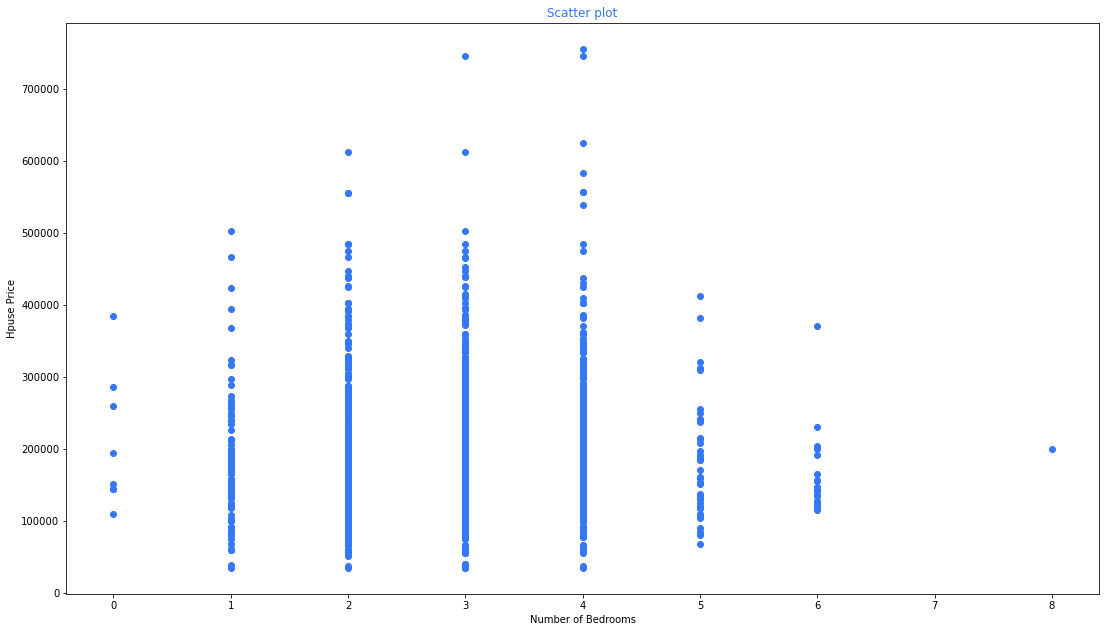

In [54]:
fig, ax = plt.subplots()

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

ax.scatter(houseDataset['BedroomAbvGr'], houseDataset['SalePrice'], color='#3478F5')

ax.set_title('Scatter plot')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Hpuse Price')

plt.show()

In [55]:
numBedroomDataset = houseDataset.groupby('BedroomAbvGr')['SalePrice'].mean().reset_index()
numBedroomDataset

,BedroomAbvGr,SalePrice
0,0,209332.375000
1,1,177063.207921
2,2,170366.572988
3,3,180904.392381
4,4,201227.222222
5,5,178060.042553
6,6,160517.190476
7,8,200000.000000


Text(0.5, 1.0, 'SalePrice and BedroomAbvGr Scatter plot')

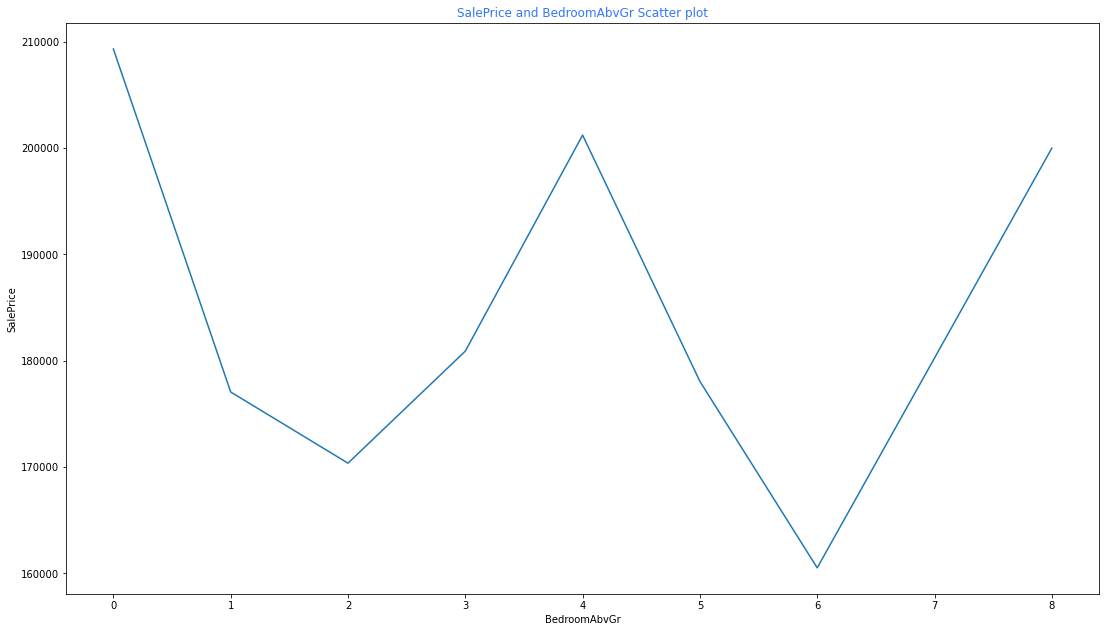

In [56]:
plt.figure(figsize=(18.5, 10.5))
sns.lineplot(data=numBedroomDataset, x="BedroomAbvGr", y="SalePrice").set_title('SalePrice and BedroomAbvGr Scatter plot')

As we can see, there is no relationship between this two variables. Later, by calculating correlation we can confirm our findings.

#### Question 4: Check which of the variables are more related to each other and show this relationship with a suitable chart (one item is enough and only show the highest correlation, use the Correlation criterion, the heatmap chart in the section can also be suitable for showing pairs of relationships)

First, we display correlations among variable using a heatmap.

<AxesSubplot:>

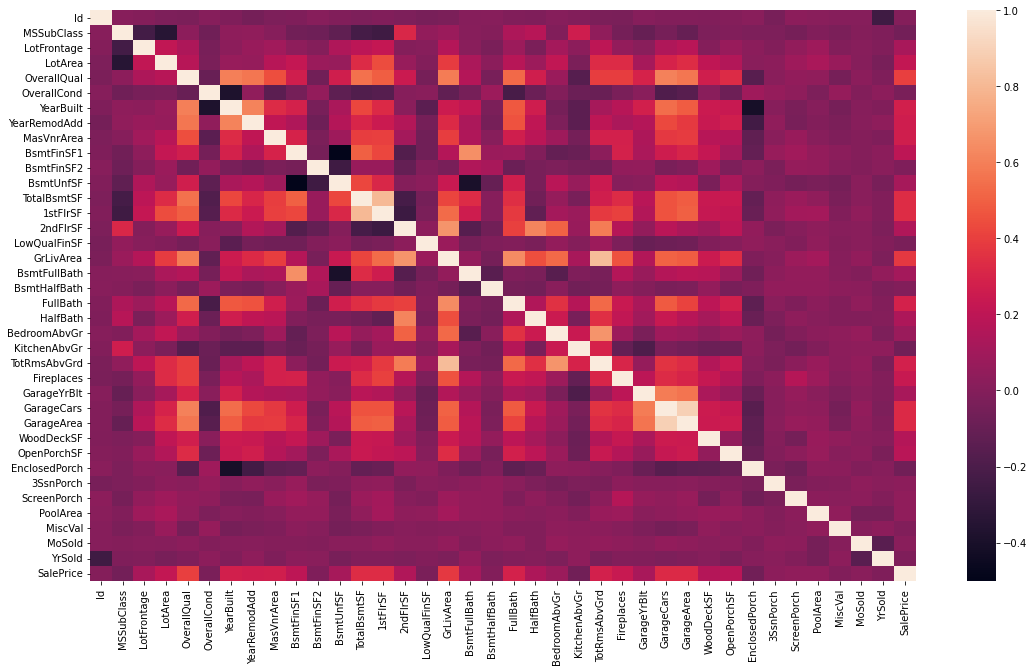

In [57]:
corr = houseDataset.corr()
plt.figure(figsize=(18.5, 10.5))
sns.heatmap(corr)

In [58]:
corr.style.background_gradient(cmap ='coolwarm')

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.012101,-0.002355,-0.025254,-0.026761,0.003505,-0.016200,-0.051449,-0.022568,-0.015844,0.010969,-0.014169,-0.023476,-0.013022,-0.021665,-0.042912,-0.029492,0.004059,0.012112,-0.011152,-0.016658,0.004733,-0.008544,-0.027292,-0.037289,0.005044,-0.007883,-0.007584,-0.010672,0.001788,0.016480,-0.042680,0.031528,0.020620,0.004251,0.005226,-0.253551,-0.001455
MSSubClass,0.012101,1.000000,-0.232140,-0.347234,0.031437,-0.069704,0.034331,0.042747,0.005188,-0.064054,-0.077018,-0.127182,-0.228265,-0.254724,0.309160,0.049729,0.076168,0.010082,-0.002704,0.141687,0.178456,-0.008819,0.262574,0.040405,-0.053441,-0.105731,-0.048120,-0.106243,-0.024881,-0.013793,-0.020802,-0.022964,-0.046158,-0.012134,-0.029550,-0.000730,-0.015852,-0.060179
LotFrontage,-0.002355,-0.232140,1.000000,0.213463,0.139101,-0.041492,0.028308,0.069790,0.100421,0.038129,-0.001370,0.147538,0.194422,0.223988,-0.002366,0.013283,0.165687,0.016638,-0.032732,0.085162,-0.031408,0.112944,0.026605,0.197055,0.050983,0.016548,0.147665,0.183566,0.001056,0.072642,0.021381,-0.004391,0.048681,0.090891,-0.005555,0.013796,-0.012019,0.121143
LotArea,-0.025254,-0.347234,0.213463,1.000000,0.175764,-0.035945,0.064134,0.056539,0.175419,0.220762,0.074530,0.062534,0.327923,0.438069,0.066689,-0.004381,0.387437,0.133292,0.022859,0.175598,0.085063,0.212639,-0.028776,0.329341,0.327291,0.116775,0.293321,0.336214,0.203860,0.160575,0.016329,0.026690,0.089432,0.131803,0.070719,0.007757,-0.039741,0.218178
OverallQual,-0.026761,0.031437,0.139101,0.175764,1.000000,-0.101746,0.596038,0.568737,0.446770,0.272137,-0.065821,0.271397,0.552298,0.490547,0.245055,-0.049476,0.584317,0.162808,-0.041062,0.530732,0.271317,0.073663,-0.161830,0.391928,0.395806,0.292346,0.602752,0.570679,0.267131,0.326691,-0.155912,0.017292,0.044799,0.043758,-0.047657,0.021782,-0.018268,0.396014
OverallCond,0.003505,-0.069704,-0.041492,-0.035945,-0.101746,1.000000,-0.382258,0.040909,-0.147695,-0.054011,0.053469,-0.136249,-0.183615,-0.165773,0.005681,0.014852,-0.124910,-0.048410,0.082582,-0.217639,-0.090401,-0.006934,-0.086557,-0.094145,-0.033351,0.016272,-0.187402,-0.159734,0.015373,-0.080964,0.096482,0.056798,0.037256,-0.021012,0.056721,-0.007225,0.029262,-0.037725
YearBuilt,-0.016200,0.034331,0.028308,0.064134,0.596038,-0.382258,1.000000,0.608912,0.331350,0.284826,-0.041054,0.127769,0.421803,0.323973,0.015955,-0.149145,0.251815,0.212603,-0.029638,0.472343,0.266154,-0.052737,-0.137991,0.114632,0.173868,0.273337,0.538993,0.485941,0.245258,0.237449,-0.407402,0.011497,-0.037766,0.007587,-0.045585,0.004898,-0.010328,0.274471
YearRemodAdd,-0.051449,0.042747,0.069790,0.056539,0.568737,0.040909,0.608912,1.000000,0.203169,0.149513,-0.075888,0.164649,0.303622,0.248947,0.158172,-0.051960,0.323858,0.133773,-0.045561,0.456905,0.208250,-0.022034,-0.142592,0.198717,0.134398,0.164268,0.427337,0.381125,0.235344,0.272330,-0.237474,0.044132,-0.041819,-0.006792,-0.029457,0.010647,0.035574,0.266089
MasVnrArea,-0.022568,0.005188,0.100421,0.175419,0.446770,-0.147695,0.331350,0.203169,1.000000,0.293004,-0.031158,0.089566,0.395529,0.396904,0.111007,-0.070874,0.392727,0.147634,0.013890,0.268157,0.189522,0.085692,-0.052594,0.278983,0.282695,0.142417,0.377905,0.387336,0.176755,0.165538,-0.127656,0.019583,0.069564,0.014216,-0.018932,-0.000049,-0.014580,0.269869
BsmtFinSF1,-0.015844,-0.064054,0.038129,0.220762,0.272137,-0.054011,0.284826,0.149513,0.293004,1.000000,-0.048071,-0.501220,0.497129,0.422264,-0.173903,-0.071887,0.164768,0.648224,0.076604,0.081121,-0.013881,-0.113195,-0.092640,0.030383,0.285635,0.136651,0.259143,0.299065,0.224986,0.108283,-0.111

Next, we sort pair of variables with highest correlation.

In [59]:
corr.abs().unstack().sort_values(kind="quicksort", ascending=False)[38:]

GarageCars    GarageArea      0.893596
GarageArea    GarageCars      0.893596
TotRmsAbvGrd  GrLivArea       0.813257
GrLivArea     TotRmsAbvGrd    0.813257
1stFlrSF      TotalBsmtSF     0.803084
                                ...   
WoodDeckSF    3SsnPorch       0.000269
GarageYrBlt   BsmtHalfBath    0.000266
BsmtHalfBath  GarageYrBlt     0.000266
MoSold        MasVnrArea      0.000049
MasVnrArea    MoSold          0.000049
Length: 1406, dtype: float64

#### Question 5: Display the distribution of house prices with box, frequency, and distribution plots. Which chart gives more information to the viewer (these charts have parameters that may help in this section). One of these parameters is the scale of the graph; Try different methods for it and check which one is more suitable.

To answer the question of which chart among box, frequency, and scatter plots gives more information to the viewer, we need first to ask what the viewer is seeking from a graph. Boxplot displays the data distribution based on a five-number summary and is great as a graph that shows our data statistically. We can find potential outliers, as we have seen before. Histograms, on the other hand, are great for displaying the shape of our data and finding the frequency of each data. Distribution plots offer what histograms have plus Kernel density estimation (KDE). To summarize, both boxplot and distribution plots offer meaningful insight from the dataset, and depending on the questions we have, they can provide us with more information.

We can use the scale parameter to control the scaling of the plot. We can pass argument, such as linear or log for each axis. Here, the default value seems better.

Text(0.5, 1.0, 'Sale Price Distribution plot')

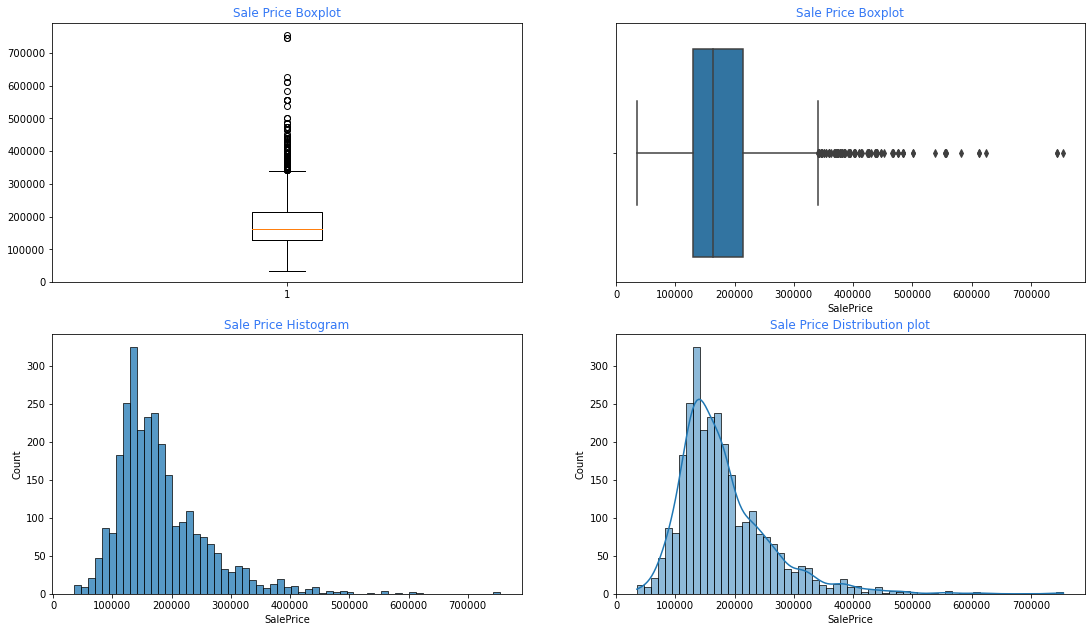

In [60]:
fig, axes = plt.subplots(2, 2)
fig.set_size_inches(18.5, 10.5)

axes[0,0].boxplot(houseDataset['SalePrice'])
axes[0, 0].set_title('Sale Price Boxplot')
sns.boxplot(x=houseDataset['SalePrice'], ax=axes[0, 1])
axes[0, 1].set_title('Sale Price Boxplot')
sns.histplot(houseDataset['SalePrice'], ax=axes[1, 0])
axes[1, 0].set_title('Sale Price Histogram')
sns.histplot(houseDataset['SalePrice'], kde=True, ax=axes[1, 1]) #`displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
axes[1, 1].set_title('Sale Price Distribution plot')

#### Question 6: Using a scatter diagram, we can draw the relationship between two variables in a two-dimensional space. Is there another diagram or a special mode of this diagram that can display the relationship of more than two variables in a two-dimensional space? If available, draw this graph for more than two parameters in a meaningful way.

Yes, there is. We can use a scatterplot to display the relationship of more than two variables in a two-dimensional space. We can use hue (colors), style, and size to meaningfully show other variables and their relationships. Below we can see an example of these plots.

<AxesSubplot:xlabel='SalePrice', ylabel='LotArea'>

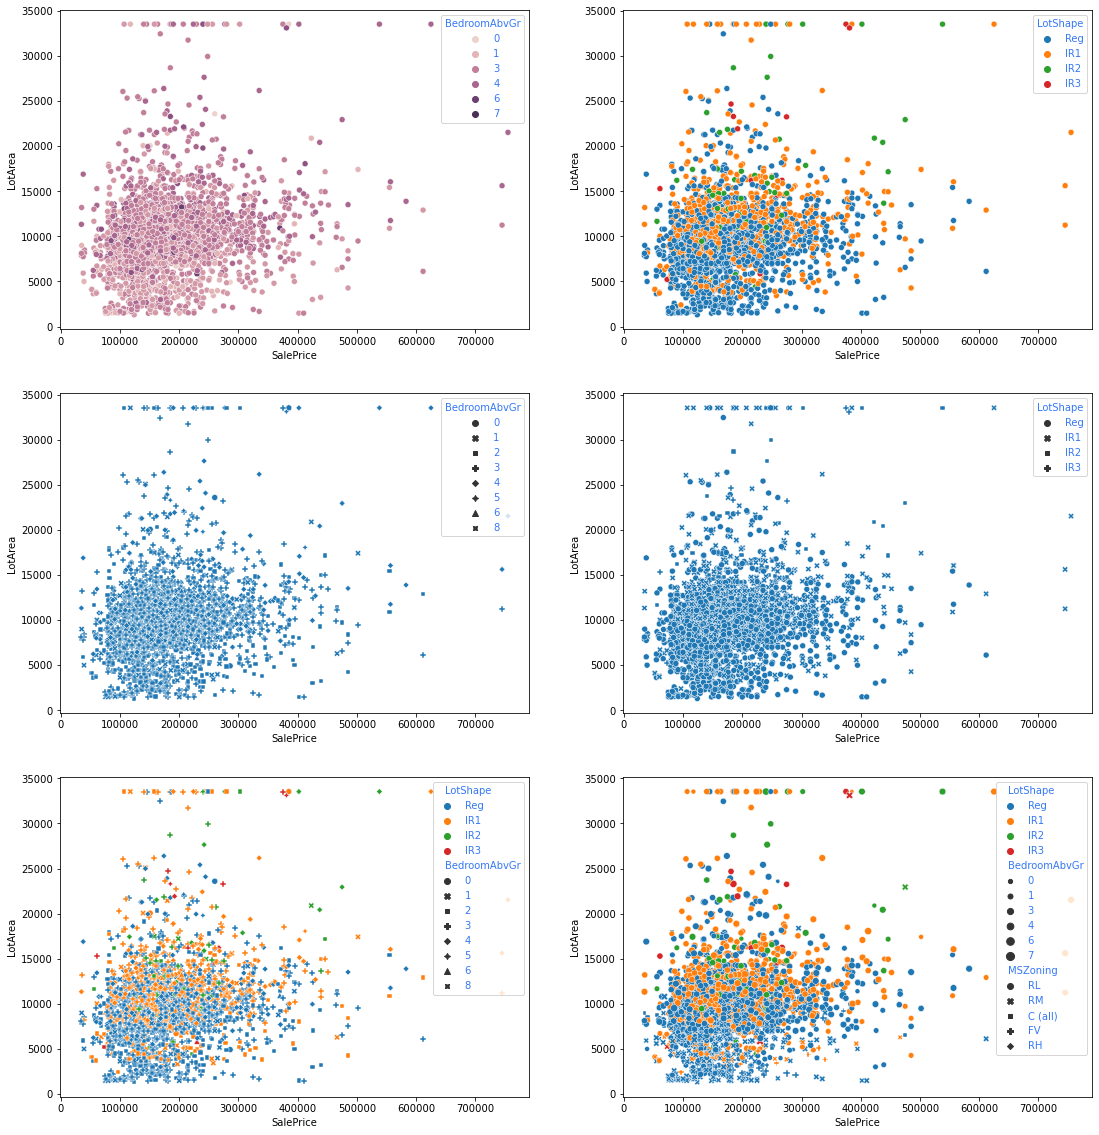

In [61]:
fig, axes = plt.subplots(3, 2)
fig.set_size_inches(18.5, 20)

sns.scatterplot(data=houseDataset, x='SalePrice', y='LotArea', hue='BedroomAbvGr', ax=axes[0, 0])
sns.scatterplot(data=houseDataset, x='SalePrice', y='LotArea', hue='LotShape', ax=axes[0, 1])
sns.scatterplot(data=houseDataset, x='SalePrice', y='LotArea', style='BedroomAbvGr', ax=axes[1, 0])
sns.scatterplot(data=houseDataset, x='SalePrice', y='LotArea', style='LotShape', ax=axes[1, 1])
sns.scatterplot(data=houseDataset, x='SalePrice', y='LotArea', hue='LotShape', style='BedroomAbvGr', ax=axes[2, 0])
sns.scatterplot(data=houseDataset, x="SalePrice", y="LotArea", hue='LotShape',  style='MSZoning', size="BedroomAbvGr", ax=axes[2, 1])

## Section 2 (Purchase)

### Preprocessing

#### Question 1: Convert all currencies to the same unit, preferably US dollars. (You can use this API (https://www.exchangerate-api.com/) to do this step)

We create an API key, send an HTTP request, and receive exchange rate information to exchange different currencies into US dollars.

In [62]:
YOUR_API_KEY = '36638159b05a569d158f21ed'

# Where USD is the base currency you want to use
url = f'https://v6.exchangerate-api.com/v6/{YOUR_API_KEY}/latest/USD'

In [63]:
# Making our request
response = requests.get(url)
currencyData = response.json()

In [64]:
# Your JSON object
currencyData

{'result': 'success',
 'documentation': 'https://www.exchangerate-api.com/docs',
 'terms_of_use': 'https://www.exchangerate-api.com/terms',
 'time_last_update_unix': 1679011202,
 'time_last_update_utc': 'Fri, 17 Mar 2023 00:00:02 +0000',
 'time_next_update_unix': 1679097602,
 'time_next_update_utc': 'Sat, 18 Mar 2023 00:00:02 +0000',
 'base_code': 'USD',
 'conversion_rates': {'USD': 1,
  'AED': 3.6725,
  'AFN': 88.0786,
  'ALL': 108.0998,
  'AMD': 388.2909,
  'ANG': 1.79,
  'AOA': 511.4417,
  'ARS': 202.825,
  'AUD': 1.5027,
  'AWG': 1.79,
  'AZN': 1.7085,
  'BAM': 1.8437,
  'BBD': 2.0,
  'BDT': 105.6483,
  'BGN': 1.8439,
  'BHD': 0.376,
  'BIF': 2072.0434,
  'BMD': 1.0,
  'BND': 1.3471,
  'BOB': 6.9337,
  'BRL': 5.2873,
  'BSD': 1.0,
  'BTN': 82.7634,
  'BWP': 13.3157,
  'BYN': 2.6334,
  'BZD': 2.0,
  'CAD': 1.3733,
  'CDF': 2051.1894,
  'CHF': 0.929,
  'CLP': 821.9004,
  'CNY': 6.8983,
  'COP': 4844.4093,
  'CRC': 548.7221,
  'CUP': 24.0,
  'CVE': 103.9417,
  'CZK': 22.6099,
  'DJF':

In [65]:
purchasesDataset[['Price', 'CurrencyISO']]

,Price,CurrencyISO
0,2.29,GBP
1,1.79,EUR
2,0.79,EUR
3,1.99,USD
4,9.99,USD
...,...,...
1408,1.49,USD
1409,0.99,USD
1410,1.49,USD
1411,0.99,USD


In [66]:
purchasesDataset['Price'] = purchasesDataset.apply(lambda x: x['Price'] / currencyData['conversion_rates'][x['CurrencyISO']], axis=1)

In [67]:
purchasesDataset['CurrencyISO'] = 'USD'

In [68]:
purchasesDataset[['Price', 'CurrencyISO']]

,Price,CurrencyISO
0,2.770050,USD
1,1.898801,USD
2,0.838018,USD
3,1.990000,USD
4,9.990000,USD
...,...,...
1408,1.490000,USD
1409,0.990000,USD
1410,1.490000,USD
1411,0.990000,USD


#### Question 2: We need to know for each purchase, on which date the user registered and in which country he resides. Add this information to the purchases table based on the user's ID.

We can merge our two datasets (purchases and users) to satisfy the above condition.

In [69]:
usersAndPurchases = pd.merge(usersDataset, purchasesDataset, how="right", on='user_id')
usersAndPurchases

,user_id,registered_time,country_code,SKU,AddedTime,Price,CurrencyISO
0,6192636,2023-01-30 16:12:02.731706+01:00,GB,personal_offer_starter_pack,2023-01-31 13:16:55.991756+00:00,2.770050,USD
1,5954105,2023-01-05 20:33:54.584158+01:00,BE,bundle_pack_1,2023-01-06 19:20:33.631714+00:00,1.898801,USD
2,5954105,2023-01-05 20:33:54.584158+01:00,BE,coin_pack_1,2023-01-07 15:56:47.792655+00:00,0.838018,USD
3,5903715,2022-12-30 18:47:41.108888+01:00,US,bundle_pack_1,2023-01-01 18:48:38.391356+00:00,1.990000,USD
4,5984323,2023-01-09 18:57:06.353154+01:00,US,golden_ticket_season_pass,2023-01-11 21:13:47.161073+00:00,9.990000,USD
...,...,...,...,...,...,...,...
1408,5964679,2023-01-07 00:50:45.364926+01:00,US,bundle_pack_1,2023-02-01 13:13:43.680081+00:00,1.490000,USD
1409,5964679,2023-01-07 00:50:45.364926+01:00,US,coin_pack_1,2023-01-19 13:51:50.503887+00:00,0.990000,USD
1410,5964679,2023-01-07 00:50:45.364926+01:00,US,bundle_pack_1,2023-02-04 23:15:25.865344+00:00,1.490000,USD
1411,5964679,2023-01-07 00:50:45.364926+01:00,US,coin_pack_1,2023-01-20 15:43:32.899227+00:00,0.990000,USD


### Data Visualization

#### Question 1: Display the total purchases by date using the appropriate chart. (in the way that you add up the total purchases in each day)

We need to groupby purchases by the date of the purchase and sum the amount of purchases to find the total value.

In [70]:
usersAndPurchases['AddedTime'] = pd.to_datetime(usersAndPurchases['AddedTime'])

In [71]:
timeData = usersAndPurchases[['AddedTime', 'Price']].groupby([usersAndPurchases['AddedTime'].dt.date]).sum().reset_index()
# Another way to accomplish the above request
# timeData = usersAndPurchases[['AddedTime', 'Price']].set_index('AddedTime').groupby(pd.Grouper(freq='D')).sum().reset_index()
timeData

,AddedTime,Price
0,2023-01-01,143.561549
1,2023-01-02,80.604488
2,2023-01-03,119.216190
3,2023-01-04,166.850787
4,2023-01-05,142.494847
5,2023-01-06,156.902749
6,2023-01-07,114.250244
7,2023-01-08,93.133619
8,2023-01-09,107.228123
9,2023-01-10,75.265894


We use lineplot because it is great for showing a variable over time.

Text(0.5, 1.0, 'Total Purchases by Date')

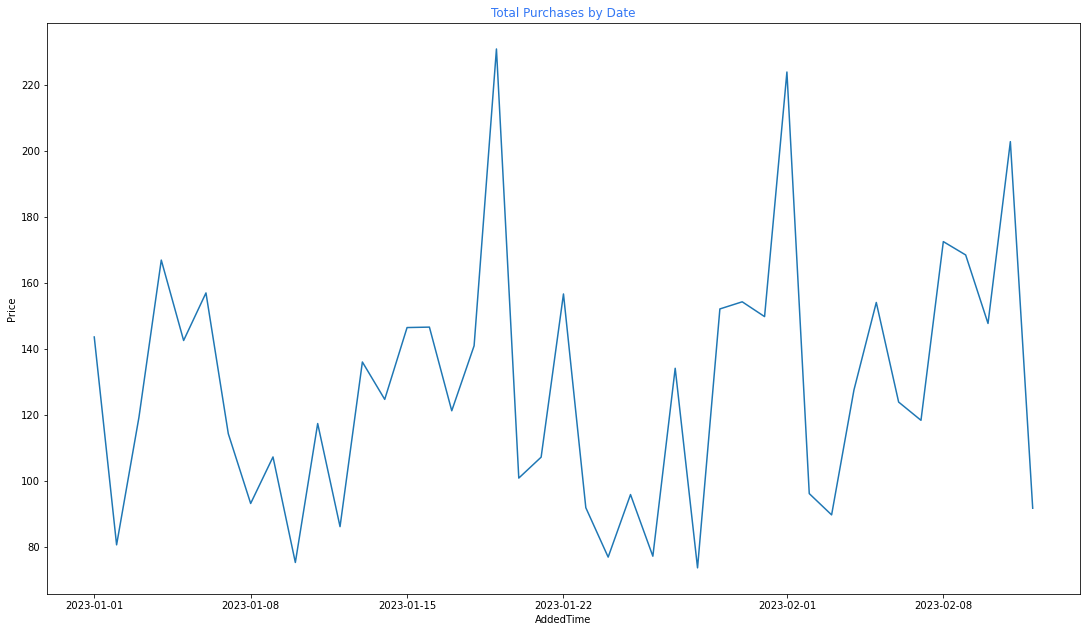

In [72]:
plt.figure(figsize=(18.5, 10.5))
sns.lineplot(data=timeData, x="AddedTime", y="Price").set_title('Total Purchases by Date')

#### Question 2: In which week are the most purchases made? (The week starts from Monday and the name of each week is determined by the date of the first day) Show the five shopping weeks with a suitable diagram

To find the answer we groupby purchases by the week of the purchase and sum the amount of purchases to find the total value for each week.

.dt.week function by default considers monday as start of the week.

In [73]:

weekData = usersAndPurchases[['AddedTime', 'Price']].groupby(usersAndPurchases['AddedTime'].dt.isocalendar().week).sum().reset_index()
# Another way to accomplish the above request
# weekData = usersAndPurchases[['AddedTime', 'Price']].set_index('AddedTime').groupby(pd.Grouper(freq='W')).sum().reset_index()
weekData.sort_values(by='Price', ascending=False, inplace=True)
weekData

,week,Price
5,6,1025.098102
2,3,1004.017287
4,5,995.071053
0,1,873.452924
1,2,793.017963
3,4,701.503931
6,52,143.561549


Again, we use lineplot because it is great for showing a variable over time.

Text(0.5, 1.0, 'Total Purchases by Week')

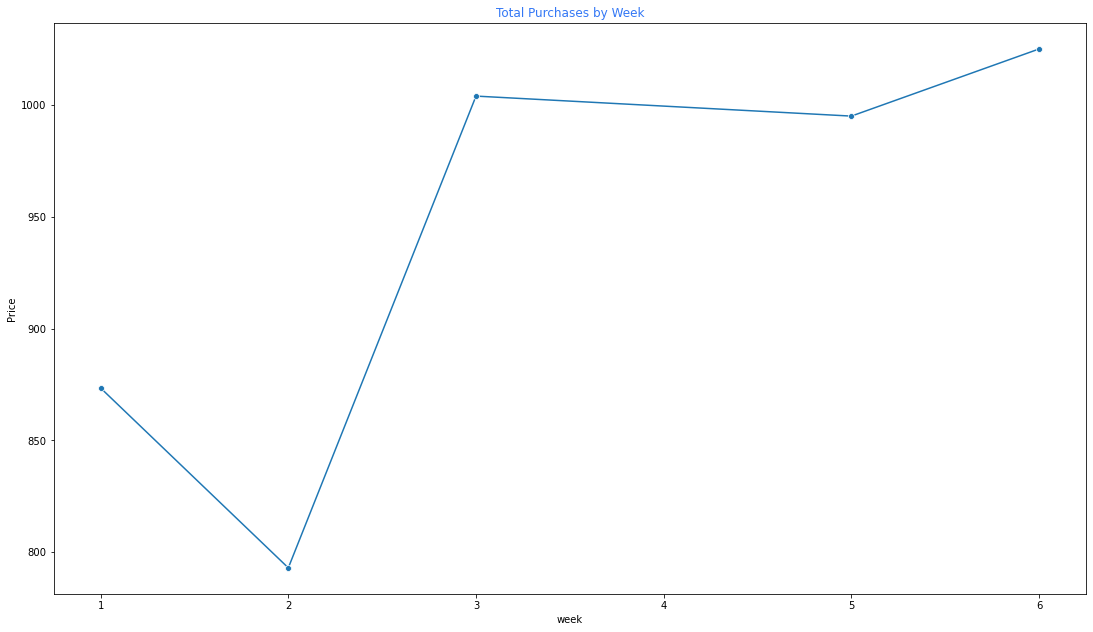

In [74]:
# We can use the line below to set plot backgrounds to white.
# sns.set_style(style='white')
# sns.lineplot(data=weekData[:5], x="week", y="Price", markers=True)

plt.figure(figsize=(18.5, 10.5))
sns.lineplot(x="week", y="Price", marker="o", data=weekData[:5]).set_title('Total Purchases by Week')

#### Question 3: Using the appropriate chart, which day of the week do users make the most purchases?

In this case we groupby purchases by the weekday of the purchase and sum the amount of purchases to find the total value for each weekday.

In [75]:
weekdayData = usersAndPurchases[['AddedTime', 'Price']].groupby(usersAndPurchases['AddedTime'].dt.weekday).sum()
weekdayData.sort_values(by=['Price'], ascending=True, inplace=True)
weekdayData = weekdayData.reset_index()
weekdayData['AddedTime'].replace({0:"Monday", 1:"Tuesday", 2:"Wednesday", 3:"Thursday",
                                  4:"Friday", 5:"Saturday", 6:"Sunday"}, inplace=True)
weekdayData

,AddedTime,Price
0,Tuesday,660.634894
1,Monday,704.290931
2,Saturday,749.932493
3,Friday,765.125167
4,Thursday,801.093640
5,Wednesday,917.180608
6,Sunday,937.465077


We use barplots for displaying the information more clearly.

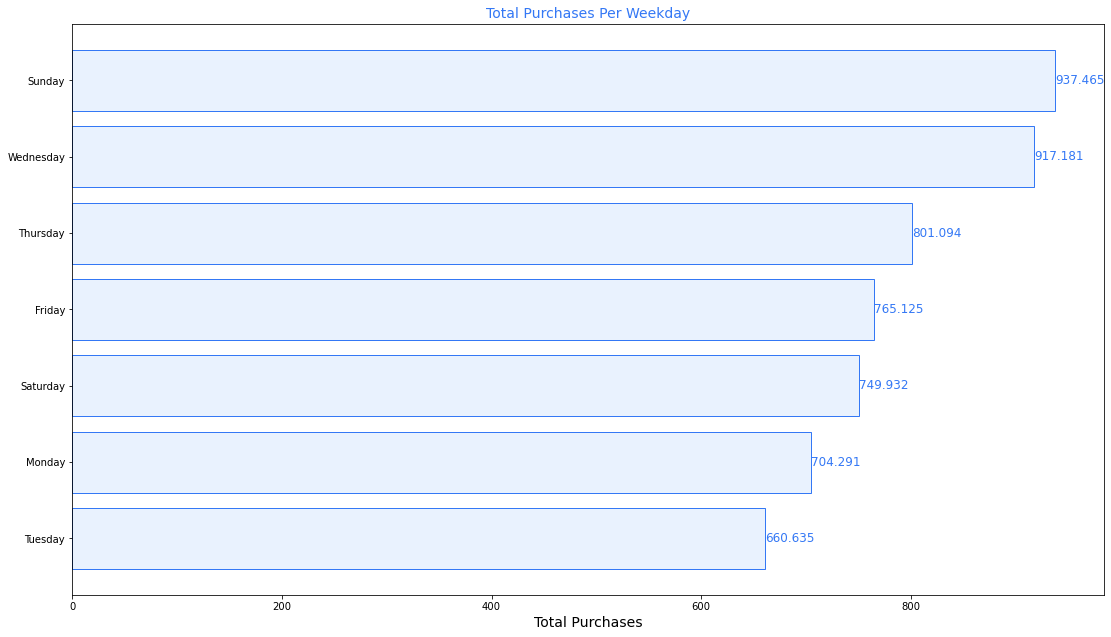

In [76]:
fig, ax = plt.subplots()

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
bars = ax.barh(weekdayData['AddedTime'], weekdayData['Price'], facecolor='#E9F2FE', edgecolor='#3478F5')

ax.bar_label(bars, fontsize=12)

plt.title('Total Purchases Per Weekday', fontsize=14)
plt.xlabel('Total Purchases', fontsize=14)
     
plt.show()

#### Question 4: Which country does the user with the most purchases belong to?

Here, the question is a little ambiguous. The following questions can be inferred from it.
 - What is the country of the user with the highest amount of purchases?
 - What is the country of the user with the highest amount of total purchases?
 - What is the country of the user with the highest number of purchases?

What is the country of the user with the highest amount of purchases? We can answer this question by sorting Price values.

In [77]:
usersAndPurchases[['user_id', 'country_code', 'Price']].sort_values(by='Price', ascending=False)

,user_id,country_code,Price
384,6188096,US,54.99
137,3887821,US,31.99
138,3887821,US,31.99
390,5640183,US,31.99
118,4787007,US,31.99
...,...,...,...
1125,5933269,NaN,0.01
805,6182314,NaN,0.01
804,6182314,NaN,0.01
1124,5933269,NaN,0.01


What is the country of the user with the highest amount of total purchases? We can answer this question by applying groupby on user_id and sum on Price.

In [78]:
usersWithHighestPurchases = usersAndPurchases[['user_id', 'Price']].groupby('user_id').sum().reset_index().sort_values(by='Price', ascending=False)
usersWithHighestPurchases

,user_id,Price
7,2474953,411.000000
14,3265117,235.270000
211,6029577,146.750000
174,5942278,145.780000
0,1507884,145.750000
...,...,...
155,5901259,0.730233
121,5698492,0.720891
271,6182314,0.040000
170,5933269,0.030000


In [79]:
highsetPurchaseId = usersWithHighestPurchases.iloc[0]['user_id']
usersAndPurchases[usersAndPurchases['user_id'] == highsetPurchaseId]

,user_id,registered_time,country_code,SKU,AddedTime,Price,CurrencyISO
988,2474953,2021-10-10 01:51:08.762136+02:00,US,bundle_pack_4,2023-01-20 22:22:39.566281+00:00,12.99,USD
989,2474953,2021-10-10 01:51:08.762136+02:00,US,bundle_pack_4,2023-01-24 18:36:35.811781+00:00,12.99,USD
990,2474953,2021-10-10 01:51:08.762136+02:00,US,bundle_pack_4,2023-02-04 23:21:41.269265+00:00,12.99,USD
991,2474953,2021-10-10 01:51:08.762136+02:00,US,piggy_bank,2023-02-07 18:52:44.806891+00:00,1.49,USD
992,2474953,2021-10-10 01:51:08.762136+02:00,US,bundle_pack_4,2023-02-03 20:38:27.776901+00:00,12.99,USD
993,2474953,2021-10-10 01:51:08.762136+02:00,US,bundle_pack_5,2023-02-11 00:05:56.227758+00:00,23.99,USD
994,2474953,2021-10-10 01:51:08.762136+02:00,US,piggy_bank,2023-02-01 20:25:03.713254+00:00,1.49,USD
995,2474953,2021-10-10 01:51:08.762136+02:00,US,bundle_pack_5,2023-01-28 00:58:40.901499+00:00,23.99,USD
996,2474953,2021-10-10 01:51:08.762136+02:00,US,bundle_pack_4,2023-01-30 18:18:20.635309+00:00,12.99,USD
997,2474953,2021-10-10 01:51:08.762136+02:00,US,bundle_pack_2,2023-01-26 10:02:27.561904+00:00,2.99,USD


What is the country of the user with the highest number of purchases? We can answer this question by applying groupby on user_id and count on Price.

In [80]:
usersWithHighestNumberOfPurchases = usersAndPurchases[['user_id', 'Price']].groupby('user_id').count().reset_index().sort_values(by='Price', ascending=False)
usersWithHighestNumberOfPurchases

,user_id,Price
7,2474953,50
215,6039515,36
88,5394301,29
64,4913028,28
306,6294656,27
...,...,...
187,5977778,1
78,5171028,1
184,5971890,1
183,5971031,1


In [81]:
highsetNumberOfPurchaseId = usersWithHighestNumberOfPurchases.iloc[0]['user_id']
usersAndPurchases[usersAndPurchases['user_id'] == highsetNumberOfPurchaseId]

,user_id,registered_time,country_code,SKU,AddedTime,Price,CurrencyISO
988,2474953,2021-10-10 01:51:08.762136+02:00,US,bundle_pack_4,2023-01-20 22:22:39.566281+00:00,12.99,USD
989,2474953,2021-10-10 01:51:08.762136+02:00,US,bundle_pack_4,2023-01-24 18:36:35.811781+00:00,12.99,USD
990,2474953,2021-10-10 01:51:08.762136+02:00,US,bundle_pack_4,2023-02-04 23:21:41.269265+00:00,12.99,USD
991,2474953,2021-10-10 01:51:08.762136+02:00,US,piggy_bank,2023-02-07 18:52:44.806891+00:00,1.49,USD
992,2474953,2021-10-10 01:51:08.762136+02:00,US,bundle_pack_4,2023-02-03 20:38:27.776901+00:00,12.99,USD
993,2474953,2021-10-10 01:51:08.762136+02:00,US,bundle_pack_5,2023-02-11 00:05:56.227758+00:00,23.99,USD
994,2474953,2021-10-10 01:51:08.762136+02:00,US,piggy_bank,2023-02-01 20:25:03.713254+00:00,1.49,USD
995,2474953,2021-10-10 01:51:08.762136+02:00,US,bundle_pack_5,2023-01-28 00:58:40.901499+00:00,23.99,USD
996,2474953,2021-10-10 01:51:08.762136+02:00,US,bundle_pack_4,2023-01-30 18:18:20.635309+00:00,12.99,USD
997,2474953,2021-10-10 01:51:08.762136+02:00,US,bundle_pack_2,2023-01-26 10:02:27.561904+00:00,2.99,USD


#### Question 5: Display the number of unique users of each country.

We need to groupby users based on their `country_code` and then count the number of unique values which can be done by nunique() method.

In [82]:
usersAndPurchases[['country_code', 'user_id']].groupby('country_code').nunique().reset_index()

,country_code,user_id
0,AU,13
1,BE,4
2,CA,10
3,CH,1
4,DE,13
5,DK,3
6,ES,1
7,FR,3
8,GB,37
9,GR,1


#### Question 6: Show the five countries with the highest purchase amount

We group by purchases by their `country_code` and then apply sum aggregation function on the `Price` and sort the values descendingly.

In [83]:
usersAndPurchases[['country_code', 'Price']].groupby('country_code').sum().reset_index().sort_values(by='Price', ascending=False)

,country_code,Price
28,US,4226.720000
8,GB,380.004839
0,AU,249.084980
4,DE,207.483944
2,CA,129.199738
1,BE,67.722314
7,FR,35.313461
10,HK,33.840000
5,DK,28.296789
23,PL,23.871208


#### Question 7: Which country has better buyers?

First, we need to define who is a good buyer. A person who purchases often can be considered a good buyer. A person who purchases large amounts also can be regarded as a good buyer. Here, we consider each country's average purchases to decide which country has the best buyers.

In [84]:
usersAndPurchases[['country_code', 'Price']].groupby('country_code').mean().reset_index().sort_values(by='Price', ascending=False)

,country_code,Price
24,RE,11.658004
13,IL,10.080315
25,SE,6.553516
21,NO,5.727909
6,ES,5.293306
27,TW,4.990000
28,US,4.554655
17,LK,4.444680
14,IM,4.100641
4,DE,4.068313


However, this is not an appropriate assumption. Why should we consider a person with one purchase of 1000 a better buyer than someone with five purchases of 200? As a result, we change our assumptions. We consider the country with the best buyers by calculating the total amount of purchases per country and dividing it by the number of unique users in each country.

In [85]:
p = pd.merge(usersAndPurchases[['country_code', 'Price']].groupby('country_code').sum().reset_index(),
        usersAndPurchases[['country_code', 'user_id']].groupby('country_code').nunique().reset_index())
p

,country_code,Price,user_id
0,AU,249.084980,13
1,BE,67.722314,4
2,CA,129.199738,10
3,CH,3.875135,1
4,DE,207.483944,13
5,DK,28.296789,3
6,ES,10.586613,1
7,FR,35.313461,3
8,GB,380.004839,37
9,GR,5.696404,1


In [86]:
p['average_purchase_per_user'] = (p['Price'] / p['user_id']).sort_values(ascending=False)
p

,country_code,Price,user_id,average_purchase_per_user
0,AU,249.084980,13,19.160383
1,BE,67.722314,4,16.930579
2,CA,129.199738,10,12.919974
3,CH,3.875135,1,3.875135
4,DE,207.483944,13,15.960303
5,DK,28.296789,3,9.432263
6,ES,10.586613,1,10.586613
7,FR,35.313461,3,11.771154
8,GB,380.004839,37,10.270401
9,GR,5.696404,1,5.696404


#### Question 8: Advertising costs money! If we want to attract a number of new users from one of the countries of this dataset using advertisements, which country should they be chosen from? What are your reasons for choosing this country?

We plot three graphs that display the number of unique users in each country, the total amount of purchases in each country, and the average purchase per user (best users.) By analyzing these graphs, we can use the best users in each country as a metric for deciding which country is the best country for advertising. However, if we had more information, we could make a more confident decision, such as the cost of advertising, the population of each country, and more.

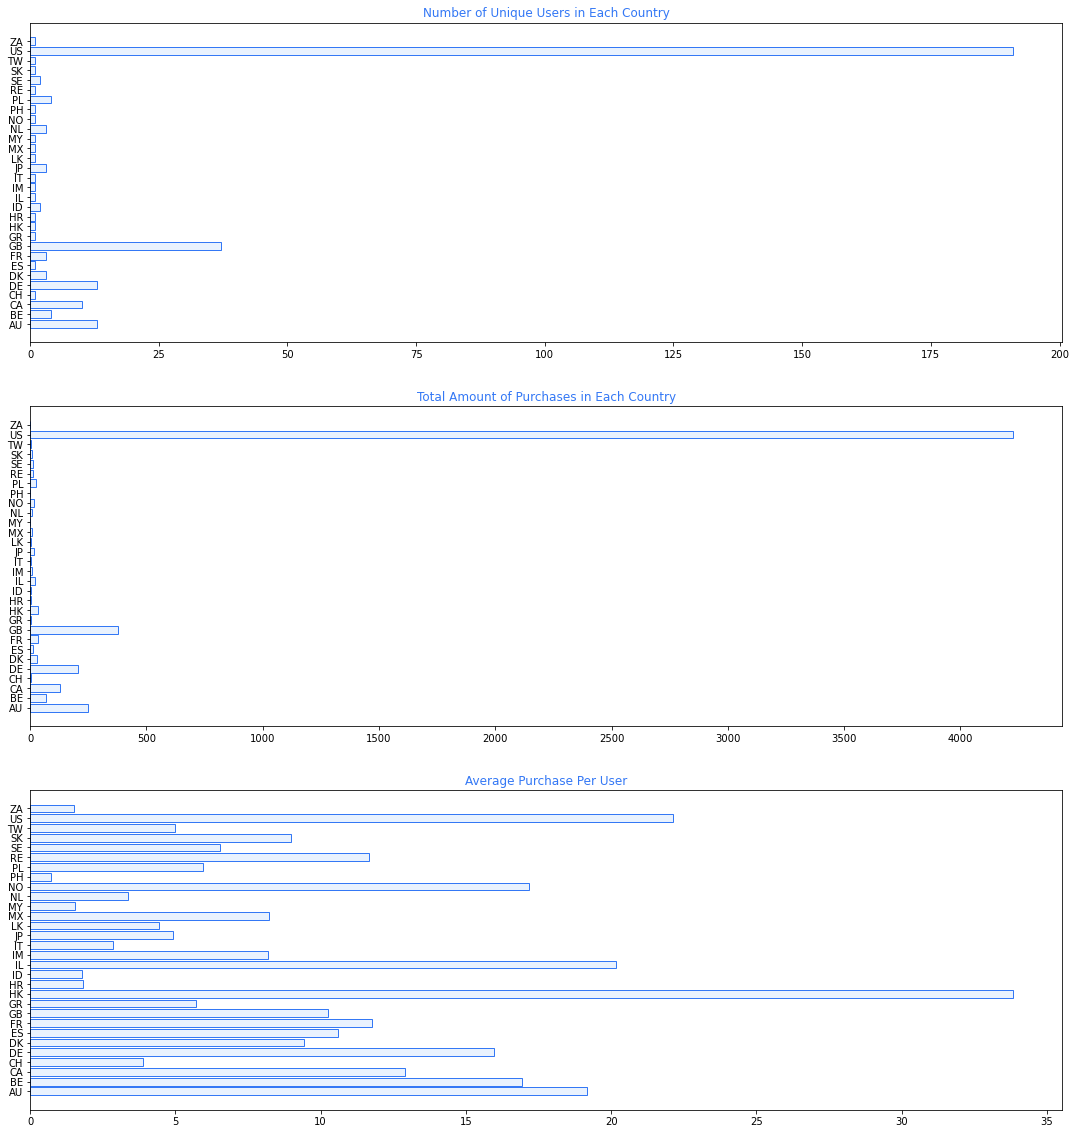

In [87]:
fig, axes = plt.subplots(3, 1)
fig.set_size_inches(18.5, 20)

a = usersAndPurchases[['country_code', 'user_id']].groupby('country_code').nunique().reset_index()
bars = axes[0].barh(a['country_code'], a['user_id'], facecolor='#E9F2FE', edgecolor='#3478F5')
axes[0].set_title('Number of Unique Users in Each Country')

b = usersAndPurchases[['country_code', 'Price']].groupby('country_code').sum().reset_index()
bars = axes[1].barh(b['country_code'], b['Price'], facecolor='#E9F2FE', edgecolor='#3478F5')
axes[1].set_title('Total Amount of Purchases in Each Country')

bars = axes[2].barh(p['country_code'], p['average_purchase_per_user'], facecolor='#E9F2FE', edgecolor='#3478F5')
axes[2].set_title('Average Purchase Per User')
     
plt.show()

#### Question 9: Display the number of registered users of each country on the map

For this question, I googled how to use python to display the number users of each country on the map and followed the instructions the website below.

Source: https://towardsdatascience.com/using-python-to-create-a-world-map-from-a-list-of-country-names-cd7480d03b10

In [88]:
usersAndPurchases.nunique()

user_id             308
registered_time     305
country_code         30
SKU                  17
AddedTime          1413
Price                91
CurrencyISO           1
dtype: int64

I used the website below to replace some of the country codes since some of the would cause the results to return as NaN.

Source: https://www.nationsonline.org/oneworld/country_code_list.htm#D

Here we create a list of countries with number of users from each country.

In [89]:
uniqueUsers = pd.DataFrame(usersAndPurchases['user_id'].unique(), columns=['user_id'])
uniqueUsers = pd.merge(uniqueUsers, usersDataset[['user_id', 'country_code']], how="left", on='user_id')
total = uniqueUsers.groupby('country_code').count().sum()
countries = (uniqueUsers.groupby('country_code').count()).reset_index()
countries.rename(columns={"user_id": "num_users"}, inplace=True)
countries.replace({"DE":"GM", "ES":"SP", "FR":"FRA", "GR":"GRC"}, inplace=True)

Here, we define a function to get latitude and longitude based on the country's code name.

In [90]:
geolocator = Nominatim(user_agent="http")
def geolocate(country):
    try:
        loc = geolocator.geocode(country) # Geolocate the center of the country
        return (loc.latitude, loc.longitude)
    except:
        return np.nan

Here, we apply above function on our dataset and get geolocalation of each country.

In [91]:
countries['geolocate'] = countries.apply(lambda x: geolocate(x['country_code']), axis=1)
countries

,country_code,num_users,geolocate
0,AU,13,"(-24.7761086, 134.755)"
1,BE,4,"(50.6402809, 4.6667145)"
2,CA,10,"(61.0666922, -107.991707)"
3,CH,1,"(46.7985624, 8.2319736)"
4,GM,13,"(13.470062, -15.4900464)"
5,DK,3,"(55.670249, 10.3333283)"
6,SP,1,"(44.23836595, 9.691232634547537)"
7,FRA,3,"(50.02294325, 8.524937254258731)"
8,GB,37,"(54.7023545, -3.2765753)"
9,GRC,1,"(53.1958274, 6.5435306)"


To maintain our dataset we separate geolocalation into two separate columns of latitude and longitude.

In [92]:
countries[['latitude', 'longitude']] = pd.DataFrame(countries['geolocate'].tolist(), index=countries.index)
countries.drop(['geolocate'], axis=1, inplace=True)
countries

,country_code,num_users,latitude,longitude
0,AU,13,-24.776109,134.755000
1,BE,4,50.640281,4.666715
2,CA,10,61.066692,-107.991707
3,CH,1,46.798562,8.231974
4,GM,13,13.470062,-15.490046
5,DK,3,55.670249,10.333328
6,SP,1,44.238366,9.691233
7,FRA,3,50.022943,8.524937
8,GB,37,54.702354,-3.276575
9,GRC,1,53.195827,6.543531


Here, we use folium to create a map of the world.

In [93]:
# Create a world map to show distributions of users 
world_map = folium.Map(tiles="cartodbpositron") #empty map
marker_cluster = MarkerCluster().add_to(world_map)

Here, we define a function to create circlemarker of user percent for each coordinate.

In [94]:
def createCirclemarkerOfUserPercent(dataFrame):
    for i in range(len(dataFrame)):
        lat = dataFrame.iloc[i]['latitude']
        long = dataFrame.iloc[i]['longitude']
        radius = 5
        popup_text = """Country : {}<br>
                    %of Users : {}<br>"""
        popup_text = popup_text.format(dataFrame.iloc[i]['country_code'],
                                   dataFrame.iloc[i]['num_users']
                                   )
        folium.CircleMarker(location = [lat, long], radius=radius, popup= popup_text, fill =True).add_to(marker_cluster)

We call the function and pass our dataset as an argument and the display the map.

In [95]:
createCirclemarkerOfUserPercent(countries)

By clicking on blue circles we can view name of the country and number of users.

In [96]:
world_map # Show the map